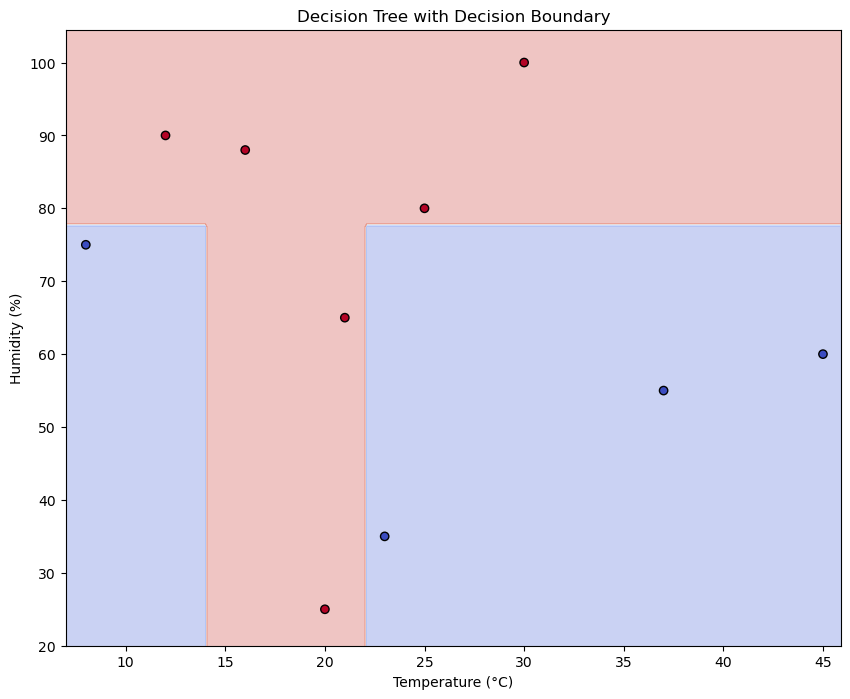

In [7]:
# Decision Tree on dataset containing temperature and humidity with prediction rain as yes or no
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier


data = {
    "Temperature": [30, 25, 37, 12, 21, 20, 45, 23, 8, 16],
    "Humidity":    [100, 80, 55, 90, 65, 25, 60, 35, 75, 88],
    "Rain":        ["Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes"]
}

df = pd.DataFrame(data)

X = df[["Temperature", "Humidity"]].values
y = (df["Rain"] == "Yes").astype(int)  


clf = DecisionTreeClassifier(max_depth=5, random_state=45)
clf.fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.1),
    np.arange(y_min, y_max, 0.5)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Blue area = region where the tree predicts No Rain
#Red area = region where the tree predicts Rain

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3,cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.title("Decision Tree with Decision Boundary")
plt.show()
